<a href="https://colab.research.google.com/github/kushal-pandey/Machine-Learning-Projects/blob/colab/alzheimer_classification_densenet169_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mount Google Drive with Colab

In [ ]:
!unzip /content/alzheimer\'s\ dataset.zip


Archive:  /content/alzheimer's dataset.zip
   creating: alzheimer's dataset/Alzheimer_Dataset/
   creating: alzheimer's dataset/Alzheimer_Dataset/test/
   creating: alzheimer's dataset/Alzheimer_Dataset/train/
   creating: alzheimer's dataset/Alzheimer_Dataset/test/MildDemented/
   creating: alzheimer's dataset/Alzheimer_Dataset/test/ModerateDemented/
   creating: alzheimer's dataset/Alzheimer_Dataset/test/NonDemented/
   creating: alzheimer's dataset/Alzheimer_Dataset/train/MildDemented/
   creating: alzheimer's dataset/Alzheimer_Dataset/train/ModerateDemented/
   creating: alzheimer's dataset/Alzheimer_Dataset/train/NonDemented/
  inflating: alzheimer's dataset/Alzheimer_Dataset/test/MildDemented/26 (19).jpg  
  inflating: alzheimer's dataset/Alzheimer_Dataset/test/MildDemented/26 (20).jpg  
  inflating: alzheimer's dataset/Alzheimer_Dataset/test/MildDemented/26 (21).jpg  
  inflating: alzheimer's dataset/Alzheimer_Dataset/test/MildDemented/26 (22).jpg  
  inflating: alzheimer's data

### Import the required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import rgb2gray # Changed grey2rgb to rgb2gray
# grey2rgb is deprecated and may not work or present in the current version of scikit-image.
# rgb2gray converts an RGB image to a grayscale image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### Import | View | Pre-Processing DATASET

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=30,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(directory='/content/alzheimer\'s dataset/Alzheimer_Dataset/train',
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  subset='training',
                                                  batch_size=128)


Found 2605 images belonging to 3 classes.


In [ ]:
# Data Validation
valid_dataset = valid_datagen.flow_from_directory(directory = '/content/alzheimer\'s dataset/Alzheimer_Dataset/train',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 128)

Found 650 images belonging to 3 classes.


100%|██████████| 5/5 [00:11<00:00,  2.40s/it]


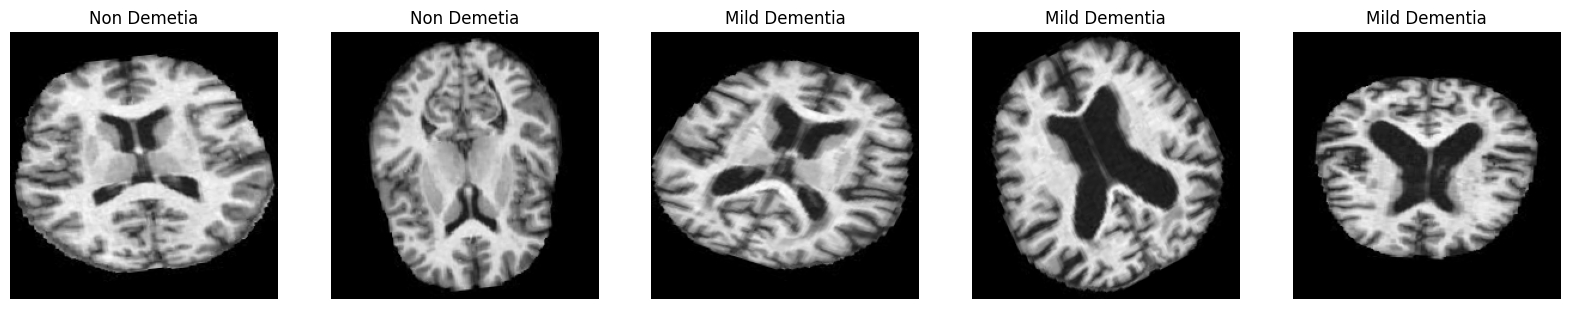

In [ ]:
# Images views from different classes
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize=(20,20))

for i in tqdm(range(0,5)):
    rand1 = np.random.randint(len(train_dataset))
    rand2 = np.random.randint(100)
    ax[i].imshow(train_dataset[rand1][0][rand2])
    ax[i].axis('off')
    a = train_dataset[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Mild Dementia')
    elif a[1] == 1:
        ax[i].set_title('Moderate Dementia')
    elif a[2] == 1:
        ax[i].set_title('Non Demetia')
    elif a[3] == 1:
        ax[i].set_title('Very Mild Dementia')

### Build the Model

In [ ]:
# Model Initialization

base_model = DenseNet169(input_shape=(224,224,3),
                         include_top=False,
                         weights="imagenet")

51877672/51877672 [==============================] - 0s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# Building Model and adjust the required parameters

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [ ]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet169 (Functional)    (None, 7, 7, 1664)        12642880  
                                                                 
 dropout (Dropout)           (None, 7, 7, 1664)        0         
                                                                 
 flatten (Flatten)           (None, 81536)             0         
                                                                 
 batch_normalization (Batch  (None, 81536)             326144    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 2048)              166987776 
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                       

In [ ]:
# Building Model and adjust the required parameters

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax')) # Change the number of units to 3 to match the number of classes in your target variable

### MODEL EVALUATION

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 0.7508 - auc: 0.8958
Epoch 1: val_auc improved from -inf to 0.83853, saving model to ./best_weights.keras
21/21 [==============================] - 119s 5s/step - loss: 0.7508 - auc: 0.8958 - val_loss: 2.3249 - val_auc: 0.8385
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 0.5495 - auc: 0.9347
Epoch 2: val_auc improved from 0.83853 to 0.83969, saving model to ./best_weights.keras
21/21 [==============================] - 120s 6s/step - loss: 0.5495 - auc: 0.9347 - val_loss: 1.6771 - val_auc: 0.8397
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 0.4473 - auc: 0.9503
Epoch 3: val_auc improved from 0.83969 to 0.86867, saving model to ./best_weights.keras
21/21 [==============================] - 107s 5s/step - loss: 0.4473 - auc: 0.9503 - val_loss: 1.6663 - val_auc: 0.8687
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 0.4369 - auc: 0.9518
Epoch 4: val_auc im

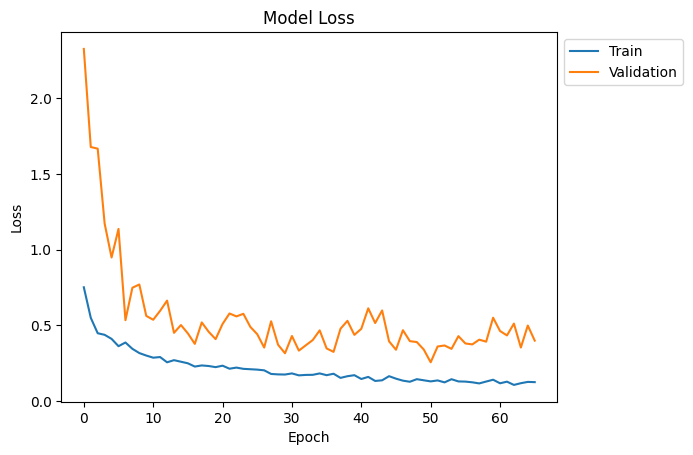

In [ ]:
# ipython-input-24-78425f822c6e
import tensorflow

# Model Compile
OPT    = tensorflow.keras.optimizers.Adam(learning_rate=0.001) # Changed lr to learning_rate



# ipython-input-26-78425f822c6e
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Defining Callbacks
filepath = './best_weights.keras' # Changed the file extension to .keras

earlystopping = EarlyStopping(monitor = 'val_auc',
                              mode = 'max' ,
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_auc',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

# ipython-input-34-78425f822c6e
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense, Activation
import matplotlib.pyplot as plt

# Building Model and adjust the required parameters
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax')) # Change the number of units to 3 to match the number of classes in your target variable

# Assuming 'X_train', 'y_train', 'X_val', and 'y_val' are your training and validation data
# and you have defined 'callback_list' in a previous cell

# Make sure to compile the model before fitting
# model.compile(...) # This line should be present and executed before model.fit

model.compile(loss='categorical_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name = 'auc')],
              optimizer=OPT)

model_history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=100, # Adjust as needed
                    batch_size=32, # Adjust as needed
                    callbacks=callback_list) # Pass the callbacks to the fit method


# Summarize history for loss function

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

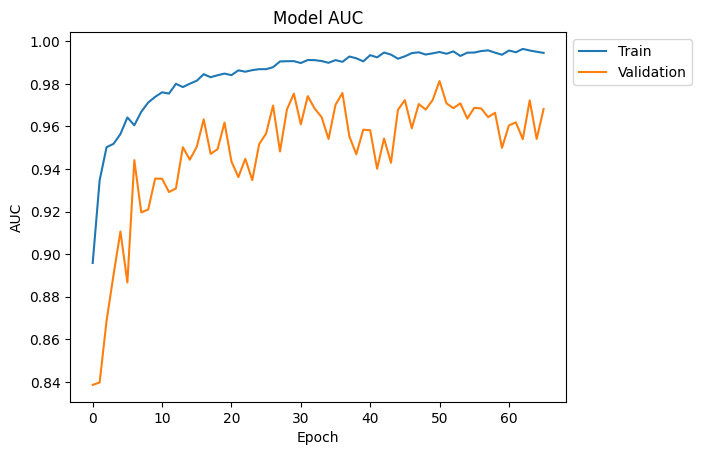

In [ ]:
# Summarize history for loss and value accuracy

plt.plot(model_history.history['auc'])
plt.plot(model_history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
# Test Model using the Test Dataset

test_dataset  = test_datagen.flow_from_directory(directory = '/content/alzheimer\'s dataset/Alzheimer_Dataset/test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 802 images belonging to 3 classes.


In [ ]:
# Evaluating Loss and AUC

model.evaluate(test_dataset)

7/7 [==============================] - 22s 3s/step - loss: 1.2668 - auc: 0.9280


[1.2667945623397827, 0.92795330286026]

1/1 [==============================] - 3s 3s/step
100.0 % chances are there that the image is NonDemented


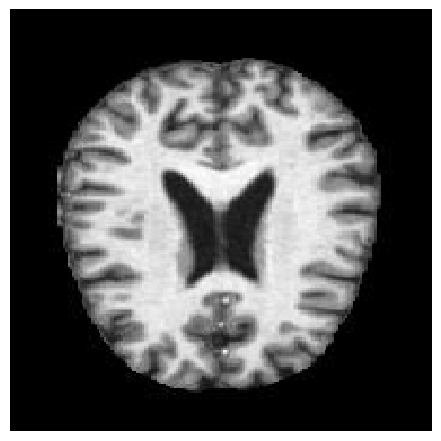

In [ ]:
# Test Case No.1: Non-Dementia

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/alzheimer\'s dataset/Alzheimer_Dataset/test/NonDemented/26 (100).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Use predict and argmax to get predicted class
predictions = model.predict(img)  # Get the predictions
answer = np.argmax(predictions, axis=-1)  # Get the class with highest probability

probability = round(np.max(predictions)*100,2) # probability from predictions

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 190ms/step
98.88 % chances are there that the image is MildDemented


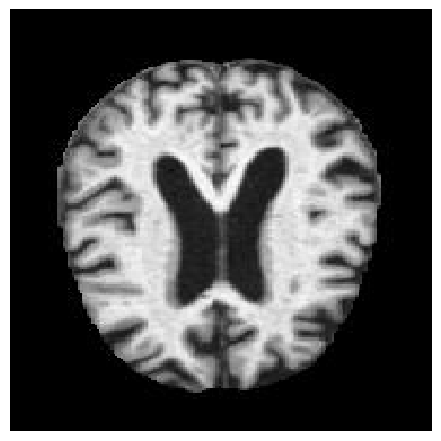

In [ ]:
# Test Case 2: Mild Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/alzheimer\'s dataset/Alzheimer_Dataset/test/MildDemented/26 (19).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Use predict and argmax to get predicted class
predictions = model.predict(img)  # Get the predictions
answer = np.argmax(predictions, axis=-1)  # Get the class with highest probability

# probability = round(np.max(model.predict_proba(img)*100),2) # predict_proba is deprecated
probability = round(np.max(predictions)*100,2) # probability from predictions

print(probability, '% chances are there that the image is',idc[answer[0]])

1/1 [==============================] - 0s 212ms/step
99.46 % chances are there that the image is ModerateDemented


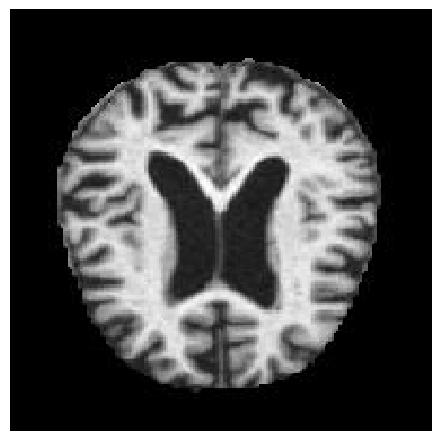

In [ ]:
# Test Case 3: Moderate Demented

dic = test_dataset.class_indices
idc = {k:v for v, k in dic.items()}

img = load_img('/content/alzheimer\'s dataset/Alzheimer_Dataset/test/ModerateDemented/27 (2).jpg', target_size = (224,224,3))
img = img_to_array(img)
img = img/255
imshow(img)
plt.axis('off')
img = np.expand_dims(img,axis=0)

# Use predict and argmax to get predicted class
predictions = model.predict(img)  # Get the predictions
answer = np.argmax(predictions, axis=-1)  # Get the class with highest probability


probability = round(np.max(predictions)*100,2) # probability from predictions

print(probability, '% chances are there that the image is',idc[answer[0]])

### Conclusion:

Finally built deep learning model using DenseNet162 transfer learning algorithm and acheived and AUC-99%.